#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data and display first few rows of data

In [2]:
db = pd.read_csv("D:\Data for machine learning\ECG Arrhythmia Classification Dataset\MIT-BIH Arrhythmia Database.csv")
db.head(10)

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
5,101,N,344,324.0,-0.083040,-0.293023,0.931546,-0.433485,-0.088745,22,...,-0.036339,8,10,19,1,-0.036339,-0.034673,-0.026985,-0.022147,-0.013531
6,101,N,324,313.0,-0.067520,-0.286934,1.050545,-0.482886,-0.074666,23,...,-0.032788,27,10,45,8,-0.032788,-0.017467,0.013925,0.035176,0.016576
7,101,N,313,313.0,-0.085844,-0.341904,1.154904,-0.439149,-0.094663,22,...,-0.008229,8,2,21,11,-0.008229,-0.011703,-0.024895,-0.034285,-0.054572
8,101,N,313,310.0,-0.061510,-0.257011,1.107787,-0.385508,-0.065044,25,...,-0.029834,21,31,61,9,-0.029834,-0.020603,0.004411,0.025997,0.015942
9,101,N,310,329.0,-0.063513,-0.319736,1.087343,-0.425738,-0.074461,22,...,0.018915,15,2,26,9,0.018915,0.010747,0.000927,-0.018538,-0.060157


#### Specifying features

In [3]:
X = db.drop(columns=['type', 'record'])
X

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,18,66,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,4,33,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,3,32,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,4,33,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,4,16,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,3,18,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,5,19,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,21,67,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,5,40,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


#### Specifying features nan

In [4]:
nan_sum_X = X.isnull().sum()
nan_sum_X

0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64

#### Specifying target

In [5]:
y = db['type']

#### Specifying target nan

In [6]:
nan_sum_y = y.isnull().sum()
nan_sum_y

0

#### Display count of each class in the target variable

In [7]:
y.value_counts()

type
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: count, dtype: int64

#### Convert class N to normal and other classes to arrhythmia

In [8]:
y.replace({'VEB': 'arrhythmia', 'SVEB': 'arrhythmia', 'F': 'arrhythmia', 'Q': 'arrhythmia', 'N': 'normal'}, inplace=True)
unique_labels = y.unique()

#### Target labeling

In [9]:
le_tar = preprocessing.LabelEncoder()
y = le_tar.fit_transform(y)

#### Visualize correlation heatmap of all features

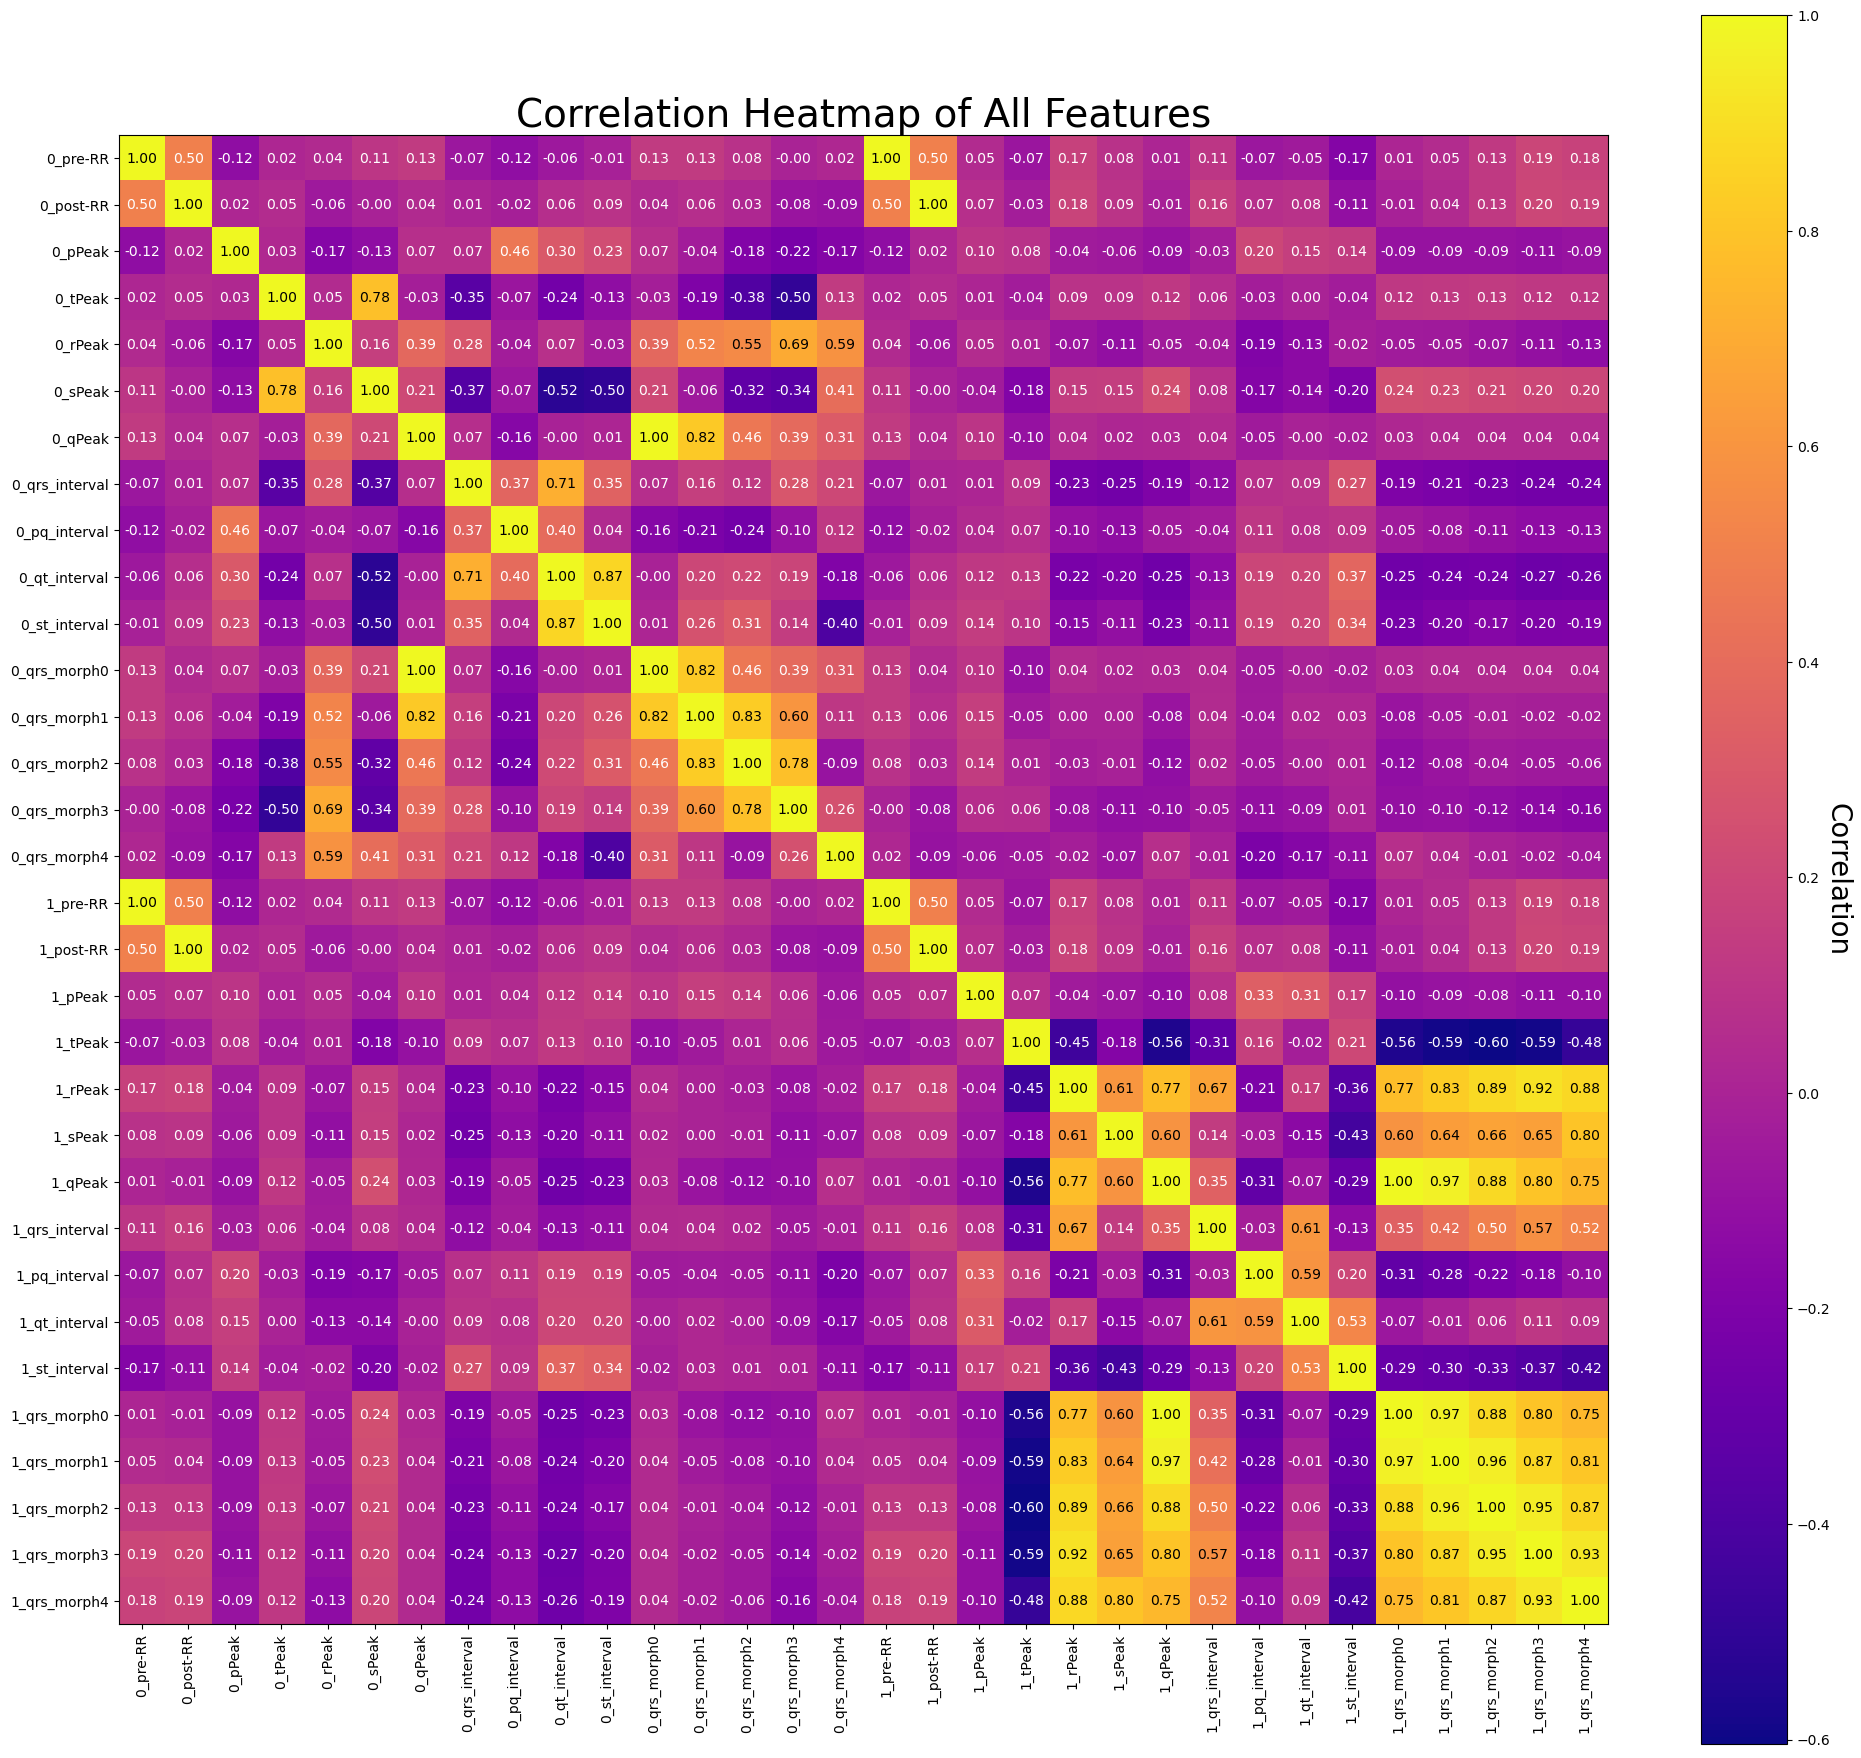

In [10]:
fig, ax = plt.subplots(figsize=(20, 18))
correlation_matrix_all = X.corr()
heatmap = ax.imshow(correlation_matrix_all, interpolation='nearest', cmap='plasma')
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Correlation', rotation=270, labelpad=15, fontdict={'fontsize': 20})

for i in range(len(correlation_matrix_all)):
    for j in range(len(correlation_matrix_all)):
        cell_value = correlation_matrix_all.iloc[i, j]
        text_color = 'black' if ((correlation_matrix_all.min().min())+0.45) <= cell_value >= ((correlation_matrix_all.max().max())-0.45) else 'white'
        text = ax.text(j, i, f'{cell_value:.2f}',
                       ha="center", va="center", color=text_color)

ax.set_xticks(range(len(correlation_matrix_all.columns)))
ax.set_yticks(range(len(correlation_matrix_all.index)))
ax.set_xticklabels(correlation_matrix_all.columns, rotation=90)
ax.set_yticklabels(correlation_matrix_all.index)
ax.set_title('Correlation Heatmap of All Features', fontdict={'fontsize': 28})

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, facecolor='white')
plt.show()

#### Preprocess data: Standardize features

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X)

#### Split data into train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (80551, 32) (80551,)
Test set: (20138, 32) (20138,)


#### Model parameter selection

In [13]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

xgb = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameter:", best_params)

Best parameter: {'n_estimators': 800}


#### Model training

In [14]:
model = XGBClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Model evaluation

In [15]:
y_pred = model.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print('Accuracy for the train data:', model.score(X_train, y_train))

F1 score: 0.9930061956395781
Accuracy for the train data: 1.0


#### Plotting the confusion matrix

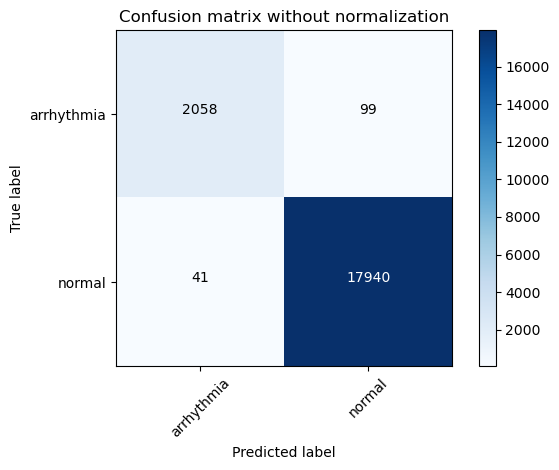

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix without normalization'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion matrix.png', dpi=300, facecolor='white')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le_tar.classes_, normalize=False,
                      title='Normalized confusion matrix')

plt.show()

#### Plotting the ROC curve

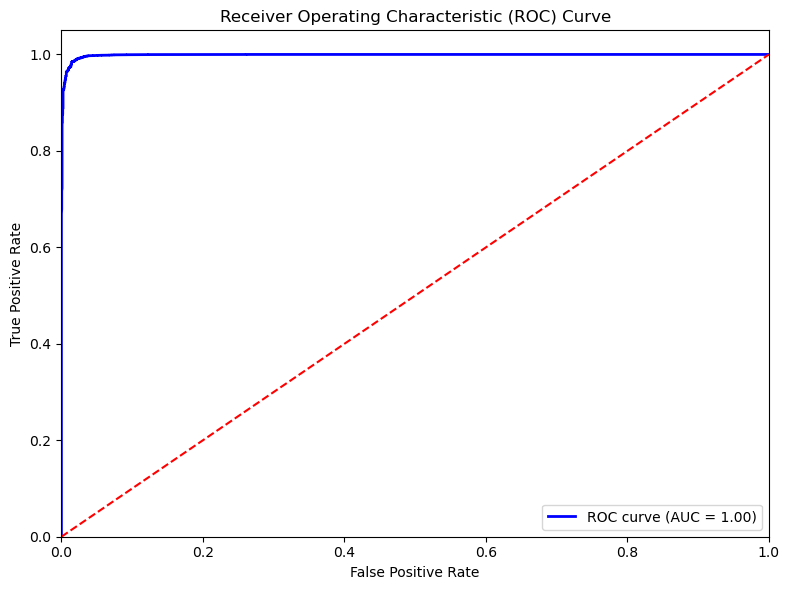

In [17]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('ROC_curve.png', dpi=300, facecolor='white')
plt.show()